# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio


- Utilizar as informações de periodos anteriores, para que possamos entender o perfil de clientes e buscar uma possivel estimativa de renda para cada categoria de cliente. Com isso, temos oportunidades de ofertar produtos mais adequados a cada publico

## Etapa 2 Crisp-DM: Entendimento dos dados


### Dicionário de dados


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  DATA DO REGISTRO                                   | OBJECT       |
| id_cliente              |  CODIGO DO CLIENTE                                  | INT          |
| sexo                    |  GENERO                                             | OBJECT       |
| posse_de_veiculo        |  POSSUI VEICULO ?                                   | BOOL         |
| posse_de_imovel         |  POSSUI IMOVEL ?                                    | BOOL         |
| qtd_filhos              |  QUANTIDADE DE FILHOS                               | INT          |
| tipo_renda              |  TIPO DE RENDA                                      | OBJECT       |
| educacao                |  ESCOLARIDADE                                       | OBJECT       |
| estado_civil            |  ESTADO CIVIL                                       | OBJECT       |
| tipo_residencia         |  TIPO DE RESIDENCIA                                 | OBJECT       |
| idade                   |  IDADE                                              | INT          |
| tempo_emprego           |  TEMPO DE EMPREGO                                   | FLOAT        |
| qt_pessoas_residencia   |  QUANTIDADE DE PESSOAS NA RESIDENCIA                | FLOAT        |
| renda                   |  RENDA                                              | FLOAT|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [30]:
#!pip install pandas-profiling
#!pip install ydata_profiling
#!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 11.1/11.1 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import statistics

from scipy import stats

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

<span style="color:red">ESCREVER AQUI</span>


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

<span style="color:red">ESCREVER AQUI</span>


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

ModuleNotFoundError: No module named 'ipywidgets'

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 63.49it/s]


In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [4]:
renda.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


In [5]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

### Unnamed: 0

In [11]:
#Avaliando a Coluna Unnamed: 0
renda['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [12]:
renda['Unnamed: 0'].nunique()

15000

In [13]:
renda['Unnamed: 0'].plot()

<Axes: >

- Coluna sem relevancia para o conjunto de dados, apenas um indice do registro dentro da base, sendo assim, podemos descarta-la quando formos gerar o nosso modelo

### Id_Cliente

In [14]:
renda['id_cliente'].value_counts().sort_values(ascending=True)

id_cliente
11585    1
6197     1
4217     1
15415    1
14560    1
        ..
8635     6
5573     6
6356     6
9351     6
6062     6
Name: count, Length: 9845, dtype: int64

- Coluna referente ao ID do cliente dentro do cadastro da organização, é possivel verificar alguns registros duplicados nesta coluna, podemos tratar para melhorar nosso modelo futuramente

### Sexo

In [15]:
renda['sexo'].value_counts(normalize=True)

sexo
F    0.6746
M    0.3254
Name: proportion, dtype: float64

In [16]:
sns.barplot(renda['sexo'].value_counts())

<Axes: xlabel='sexo', ylabel='count'>

- Dados majoritariamente femininos, sendo eles aproximadamente 67% mulheres dentro desta base de dados

### posse_de_veiculo

In [17]:
renda['posse_de_veiculo'].value_counts()

posse_de_veiculo
False    9140
True     5860
Name: count, dtype: int64

In [18]:
sns.barplot(renda['posse_de_veiculo'].value_counts())

<Axes: xlabel='sexo', ylabel='count'>

- A maioria dos registros não tem posse de veiculo

### posse_de_imovel

In [19]:
renda['posse_de_imovel'].value_counts()

posse_de_imovel
True     10143
False     4857
Name: count, dtype: int64

In [20]:
sns.barplot(renda['posse_de_imovel'].value_counts())

<Axes: xlabel='sexo', ylabel='count'>

- A quantidade de registros com posse de imovel é maior VERDADEIRO do que FALSO

### qtd_filhos

In [21]:
cont = renda['qtd_filhos'].value_counts()
cont

qtd_filhos
0     10376
1      3037
2      1376
3       185
4        17
7         5
14        2
5         2
Name: count, dtype: int64

In [22]:
renda['qtd_filhos'].isnull().sum()

np.int64(0)

In [23]:
plt.figure(figsize=(12,6))
plt.bar(cont.index, cont.values)

<BarContainer object of 8 artists>

- A grande maioria dos registros não tem filhos

### tipo_renda

In [24]:
cont = renda['tipo_renda'].value_counts()
cont

tipo_renda
Assalariado         7633
Empresário          3508
Pensionista         2582
Servidor público    1268
Bolsista               9
Name: count, dtype: int64

In [25]:
plt.figure(figsize=(12,6))
plt.bar(cont.index, cont.values)

<BarContainer object of 5 artists>

- Base dividida em 5 rotulos de tipo de renda, e na sua grande maioria assalariado

### tipo_residencia e estado_civil

In [26]:
col_alvos = ['estado_civil','tipo_residencia']

for col in col_alvos:
    cont = renda[col].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(cont.index, cont.values)
    plt.plot

## Análise das váriaveis categóricas

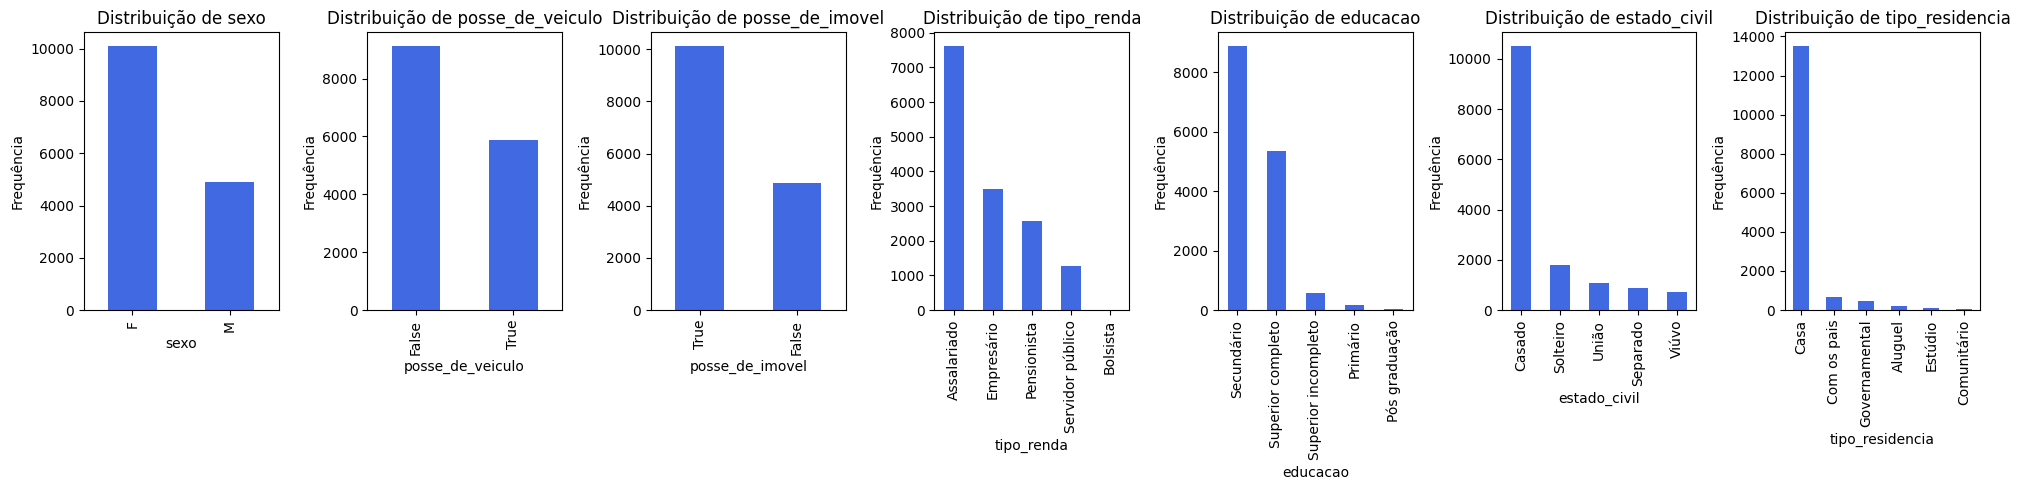

In [7]:
#Definindo as colunas categoricas
dados_cat = renda.select_dtypes(include=['object', 'bool'])
colunas_cat = dados_cat.columns
colunas_cat

#Criando a figura e os subplots
fig, axes = plt.subplots(1, len(colunas_cat), figsize=(20, 5))  # 1 linha, 5 colunas

# Loop para criar os gráficos
for i, col in enumerate(colunas_cat):
    renda[col].value_counts().plot(kind='bar', ax=axes[i], color='royalblue')
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()

- Dados majoritariamente femininos, sendo eles aproximadamente 67% mulheres dentro desta base de dados
- A maioria dos registros não tem posse de veiculo
- A quantidade de registros com posse de imovel é maior VERDADEIRO do que FALSO
- Base dividida em 5 rotulos de tipo de renda, e na sua grande maioria assalariado

## Analise das variáveis numéricas

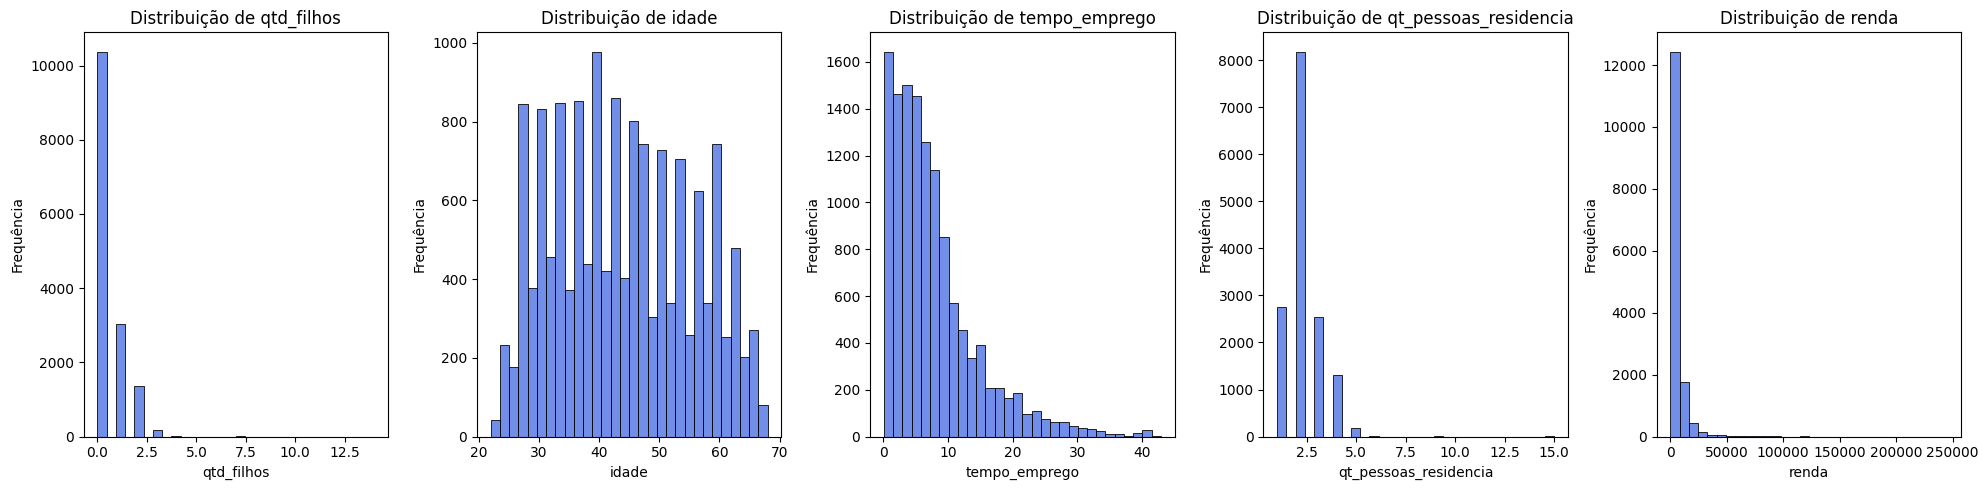

In [8]:
#Definindo as colunas que serão analisadas
dados_num = renda.select_dtypes(include=['float','int'])
dados_num = dados_num.iloc[:,2:]
colunas_num = dados_num.columns

#Criando a figura
fig, axes = plt.subplots(1, len(colunas_num), figsize=(20,5))

#Repetição para criar os graficos
for i, col in enumerate(colunas_num):
    sns.histplot(renda[col], bins=30, color="royalblue", ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    
# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


- A grande maioria dos registros não tem filhos
- A idade não tem uma distribuição normal
- Os registros indicam que a maioria das pessoas tem uma tempo de emprego entre 0 a 10 anos

### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


<Axes: >

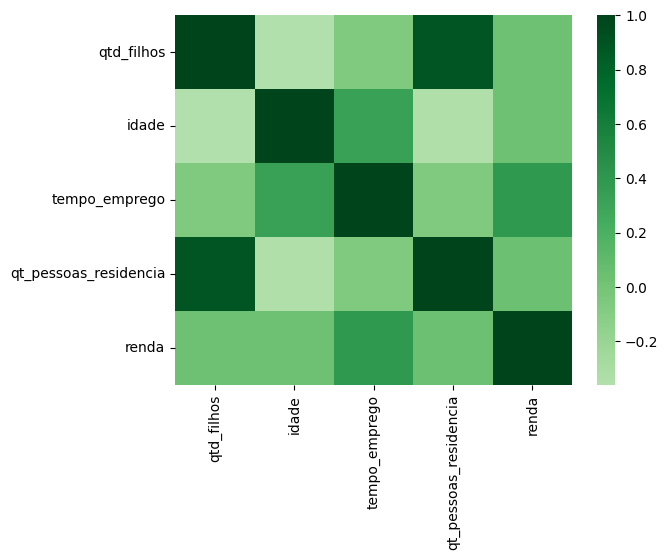

In [9]:
corr = dados_num.corr()
sns.heatmap(corr, center=0, cmap = 'Greens')

### Analisando Qtd_Filhos e Qtd_Pessoas_residencia

<Axes: xlabel='qtd_filhos', ylabel='qt_pessoas_residencia'>

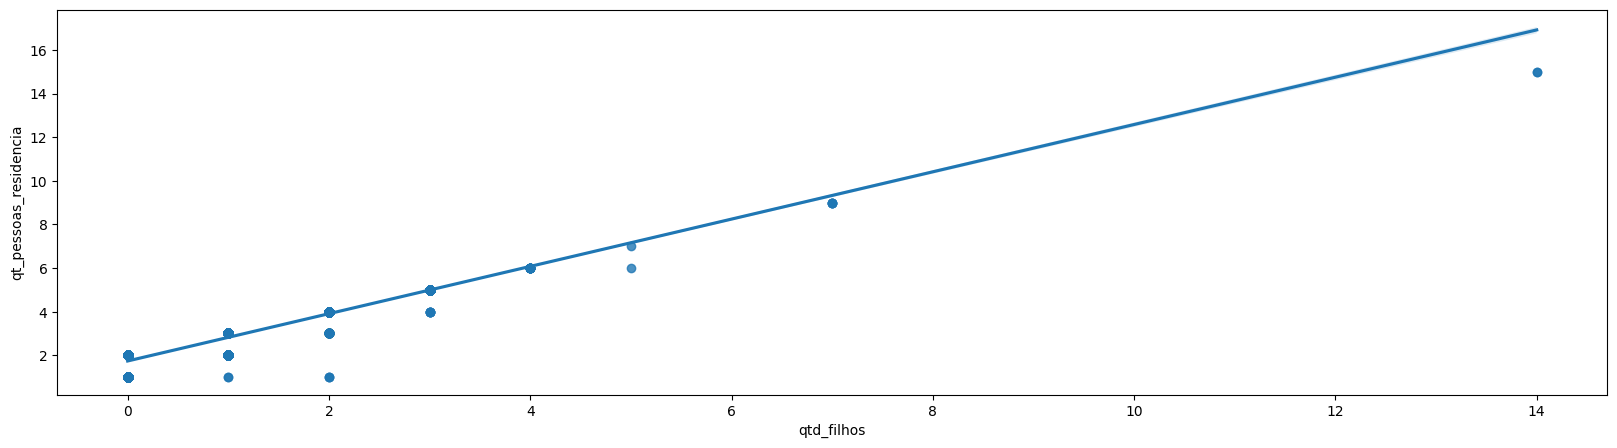

In [10]:
plt.figure(figsize= (20,5))
sns.regplot(renda, x='qtd_filhos', y='qt_pessoas_residencia')

- Como é esperado, quanto maior a quantidade de filhos, mais pessoas na residência

### Analisando (tempo_emprego x idade) e (tempo_emprego x renda)

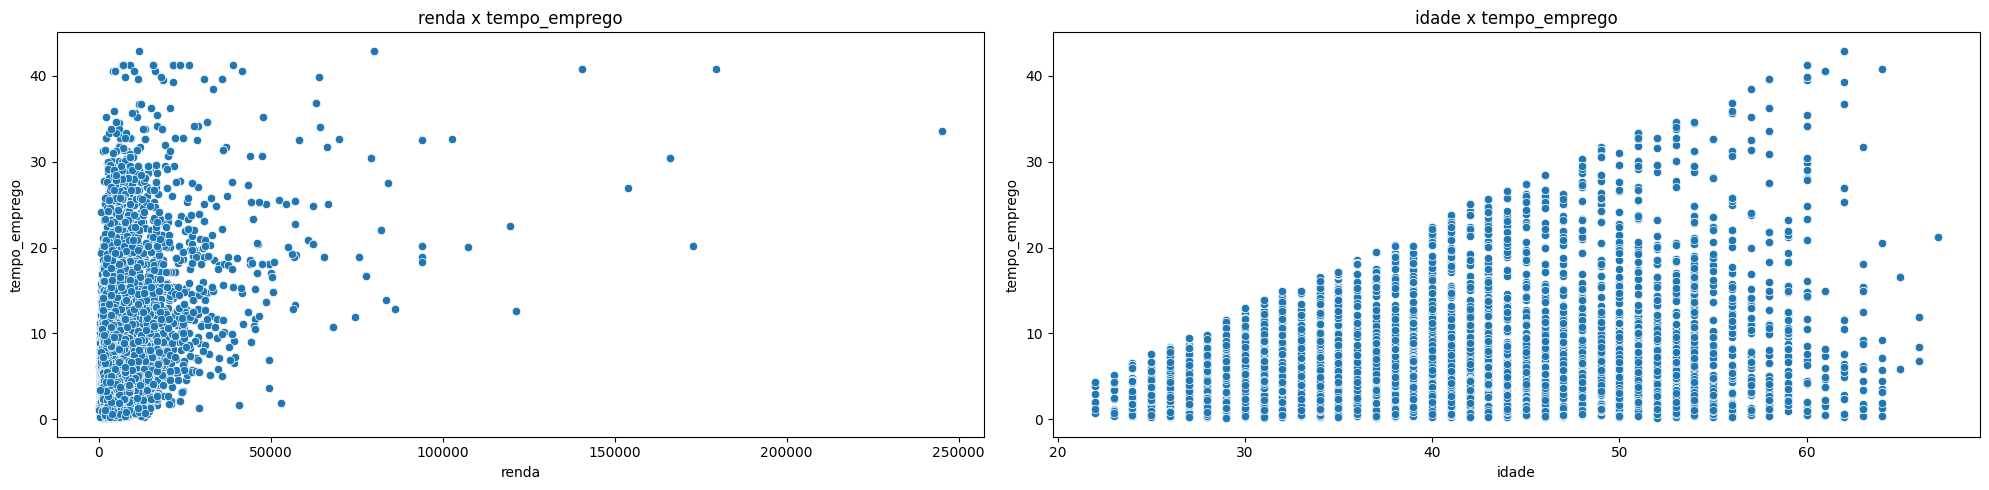

In [11]:
colunas = ['renda','idade']

fig, axes = plt.subplots(1,2,figsize=(20,5))
for i, col in enumerate(colunas):
    sns.scatterplot(renda,x=col,y='tempo_emprego', ax=axes[i])
    axes[i].set_title(f'{col} x tempo_emprego')

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()
    

- Analisando as duas váriáveis que mais tem corelação com a nossa variável resposta, que é a renda, podemos observar que tmeos uma tendencia de que para as duas váriaveis, quanto maior elas sejam, mais a renda é afetada, mostrando assim que são duas váriaveis importantes para analisarmos

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [12]:
renda.head(3)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


In [17]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  float64
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  float64
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  object 
 5   posse_de_imovel        15000 non-null  object 
 6   qtd_filhos             15000 non-null  float64
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  float64
 12  tempo_emprego          15000 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [14]:
#Identificando variáveis com valores nulos
renda.isnull().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [18]:
#Identificando a média e a mediana, para entender qual dado pode fazer mais sentido na análise, e substituir os valores nulos
desc = renda.tempo_emprego.describe()
renda['tempo_emprego'] = renda['tempo_emprego'].astype('float')
media = renda.tempo_emprego.mean()#Substituindo para float, para acompanhar os tipos de dado da váriavel

#Substituindo os dados nulos pela média
renda.loc[renda['tempo_emprego'].isnull()] = media
renda.isnull().sum()




Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [32]:
#Selecionando as colunas mais apropriadas para a modelagem
renda_mod = renda.drop(['Unnamed: 0','data_ref','id_cliente'], axis=1)
renda_mod.head(2)

#Gerando váriaveis dummies para conseguirmos aplicar nossa modelagem, pois o modelo selecionado não lida com váriaveis string
renda_mod = pd.get_dummies(renda_mod, drop_first=True)
renda_mod.head(2)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_True,posse_de_veiculo_7.722634652121815,posse_de_imovel_True,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0.0,26.0,6.602740,1.0,8060.34,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False
1,0.0,28.0,7.183562,2.0,1852.15,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [54]:
#Separando variáveis explicativas e váriavel resposta
X = renda_mod.iloc[:,:-1]
y = renda_mod['renda']
y

0        8060.340000
1        1852.150000
2        2253.890000
3        6600.770000
4        6475.970000
            ...     
14995    7990.580000
14996       7.722635
14997     604.820000
14998    3352.270000
14999    1160.990000
Name: renda, Length: 15000, dtype: float64

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


- Será utilizado para esta base de dados, um modelo de árvore de regressão

In [34]:
#Separando a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=315, train_size=0.7)

### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [38]:
#Gerando as árvores
clf = DecisionTreeRegressor(max_depth=2, random_state=325)
clf_2 = DecisionTreeRegressor(max_depth=8, random_state=326)

#Treinando o modelo com a base de treinamento
tree_2 = clf.fit(X_train, y_train)
tree_8 = clf_2.fit(X_train, y_train)

#Realizando a primeira predição
y_pred2 = tree_2.predict(X_test)
y_pred8 = tree_8.predict(X_test)

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


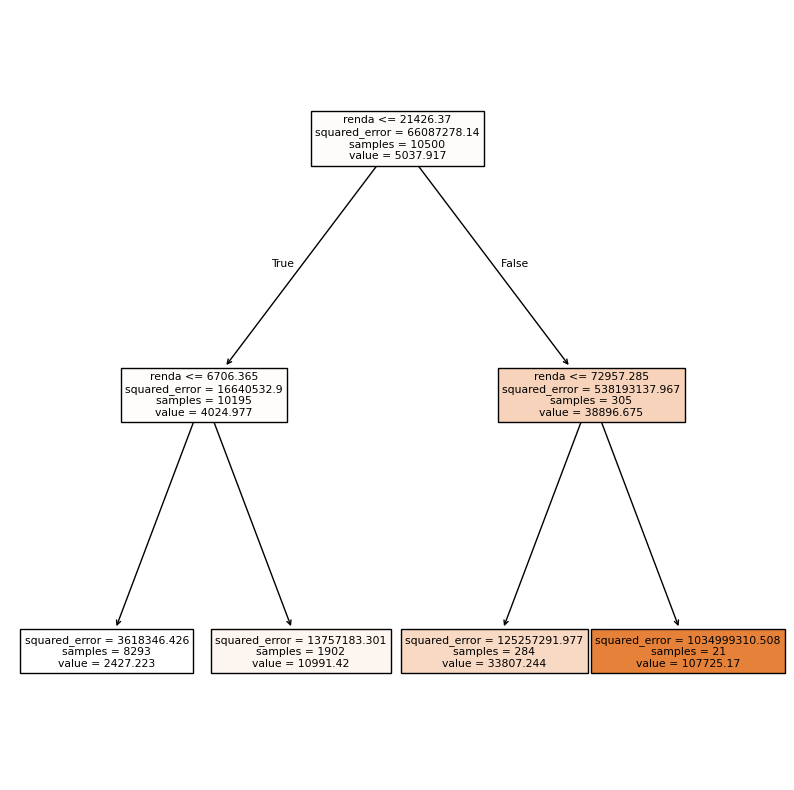

In [51]:
#Visualizando a arvore de profundidade 2
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(tree_2, 
                    feature_names=X.columns,  
                    filled=True) 

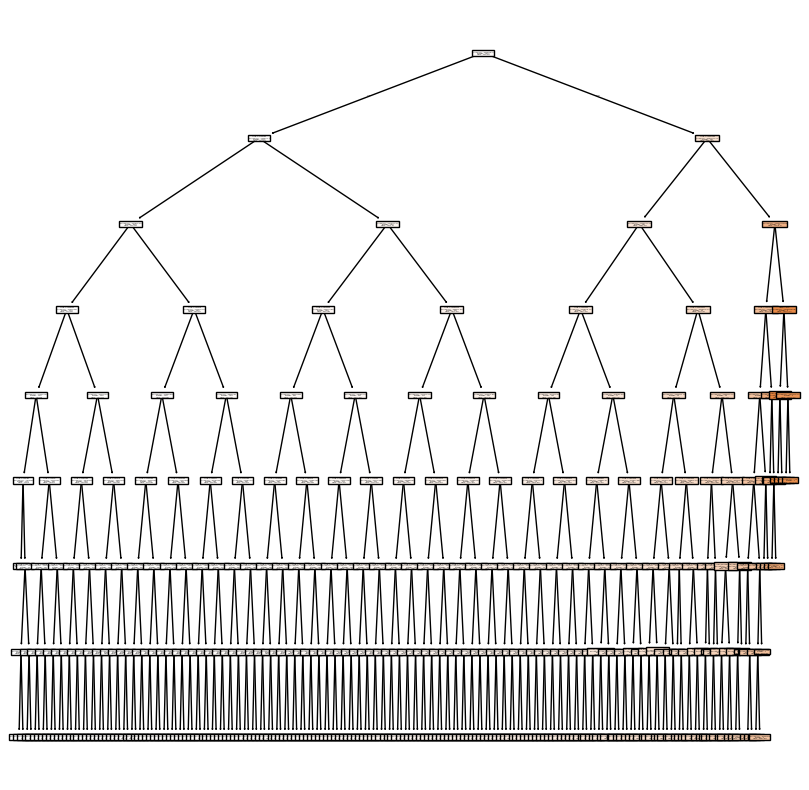

In [52]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(tree_8, 
                    feature_names=X.columns,  
                    filled=True) 

In [56]:
# Calculando as métricas para o modelo com max_depth=2
mae2 = round(mean_absolute_error(y_test, y_pred2),2)
mse2 = round(mean_squared_error(y_test, y_pred2),2)
rmse2= round(np.sqrt(mse2),2)
r2_2 = round(r2_score(y_test, y_pred2),2)

# Calculando as métricas para o modelo com max_depth=8
mae8 = round(mean_absolute_error(y_test, y_pred8),2)
mse8 = round(mean_squared_error(y_test, y_pred8),2)
rmse8 =round(np.sqrt(mse8),2)
r2_8 = round(r2_score(y_test, y_pred8),2)

# Exibindo os resultados
print(f"Modelo com max_depth=2: MAE={mae2}, MSE={mse2}, RMSE={rmse2}, R²={r2_2}")
print(f"Modelo com max_depth=8: MAE={mae8}, MSE={mse8}, RMSE={rmse8}, R²={r2_8}")

Modelo com max_depth=2: MAE=2160.09, MSE=15910697.43, RMSE=3988.82, R²=0.81
Modelo com max_depth=8: MAE=56.25, MSE=1540881.4, RMSE=1241.32, R²=0.98


- Observando o R² dos modelos, podemos observar que um possivel overfiting esta ocorrendo no modelo de profundidade 8, vamos tentar aplicar algumas pós podas no modelo, para melhorarmos

In [59]:
path = tree_8.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.85824309e-01, 9.31068044e-01, 1.01305592e+00,
        2.83316429e+00, 4.01416637e+00, 4.62770608e+00, 1.05108423e+01,
        1.16436864e+01, 1.28963220e+01, 1.32103936e+01, 1.70950924e+01,
        1.71596709e+01, 1.72435640e+01, 2.14305641e+01, 2.32066670e+01,
        2.46484059e+01, 2.79989028e+01, 2.83915160e+01, 3.04738952e+01,
        3.15169418e+01, 3.32310812e+01, 3.33809020e+01, 3.63002683e+01,
        3.68891824e+01, 3.72278642e+01, 3.84418406e+01, 3.95163202e+01,
        4.04664607e+01, 4.10857606e+01, 4.24524228e+01, 4.42072870e+01,
        4.72065480e+01, 4.74190509e+01, 4.86066043e+01, 4.93798420e+01,
        5.07839603e+01, 5.10018789e+01, 5.17322901e+01, 5.17741166e+01,
        5.25213549e+01, 5.35796726e+01, 5.59487088e+01, 5.61549103e+01,
        5.62287468e+01, 5.70941530e+01, 5.82514792e+01, 5.91321209e+01,
        6.02150701e+01, 6.11231844e+01, 6.14761601e+01, 6.15574330e+01,
        6.43751740e+01, 6.59744332e+01, 6.61901354

Text(0, 0.5, 'Impureza total das folhas')

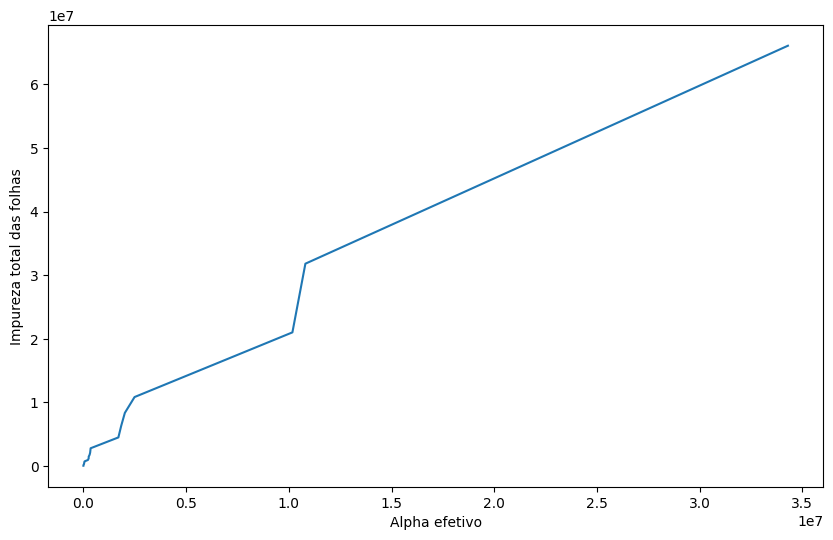

In [60]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [61]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

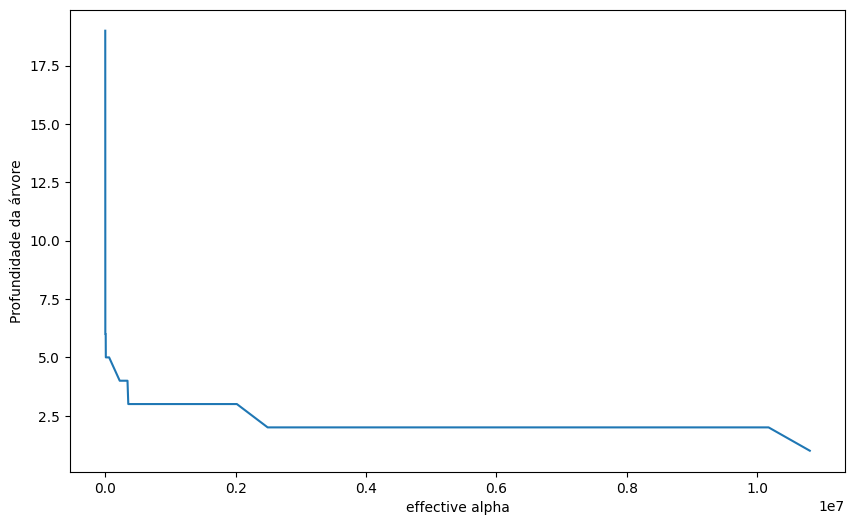

In [62]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

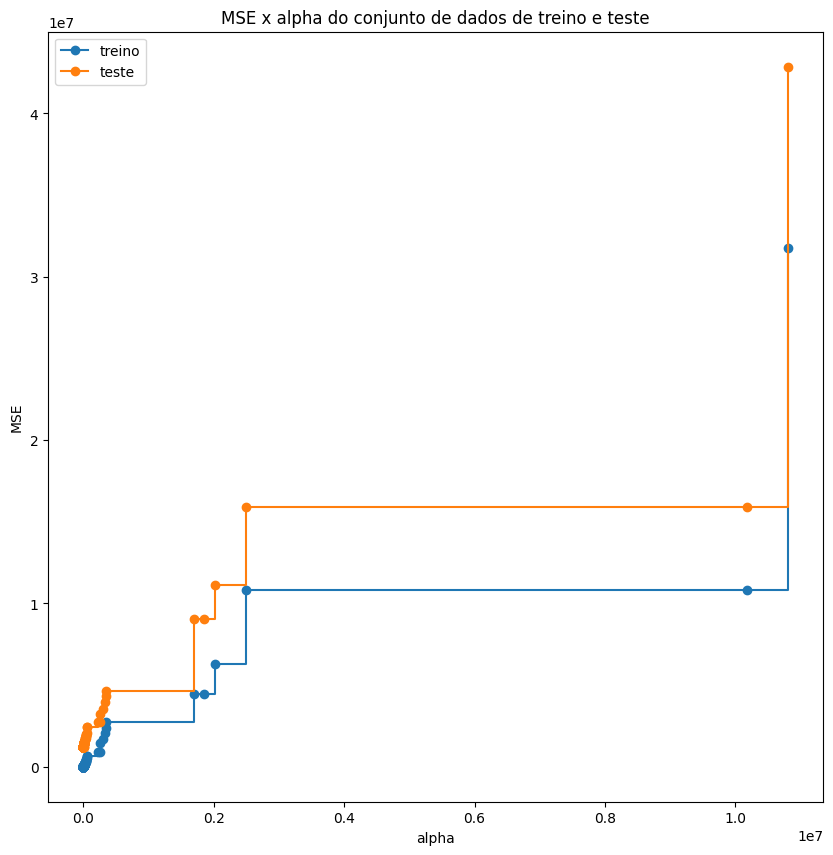

In [63]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [65]:
tree_final = DecisionTreeRegressor(ccp_alpha=0.25)
tree_final.fit(X_train, y_train)
y_pred_final = tree_final.predict(X_test)

scr_final = r2_score(y_test, y_pred_final)
scr_final

0.9814672483049395

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.